# Latar Belakang Project

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. 

Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id (https://covid19.go.id/peta-sebaran) besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR (https://pikobar.jabarprov.go.id/data) milik pemerintah Provinsi Jawa Barat. 
Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.



In [1]:
# Intermezzo

bersatulawancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(bersatulawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


---
# Ambil data dari API (Application Programming Interface) yang tersedia di covid19.go.id

Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.

In [2]:
import requests

resp = requests.get('https://data.covid19.go.id/public/api/update.json')

## Evaluasi Respon

Saat menjalankan fungsi get(), pada dasarnya hal yang terjadi adalah membuat sebuah permintaan kepada server penyedia API. 

Permintaan tersebut selanjutnya diproses dan dijawab oleh server sebagai sebuah respon. Objek resp yang telah buat memiliki informasi respon oleh server.

#### Ada tiga informasi utama dalam sebuah respon API, yaitu status, headers, dan body. 
- Status memiliki informasi apakah permintaan berhasil atau tidak dan dinyatakan dalam status code, 
- headers umumnya mengandung informasi metadata, 
- sedangkan body berisikan konten atas permintaan yang telah dibuat.

#### Status Code
Ada beberapa jenis status code yang umumnya dijumpai, antara lain:
- 200 Artinya permintaan sukses dipenuhi.
- 404 Artinya berkas yang diminta tidak dapat ditemukan.
- 500 Artinya akses permintaan ditolak.
- 501 Artinya terjadi kesalahan pada server.


In [3]:
# Status code
print(resp)

#  status code 200 menyatakan bahwa permintaan 
# berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak.

<Response [200]>


In [4]:
# Headers API
print(resp.headers)

# 'Content-Type': 'application/json'

{'Server': 'nginx', 'Date': 'Tue, 20 Jul 2021 09:07:27 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Tue, 20 Jul 2021 09:02:26 GMT', 'ETag': 'W/"60f69122-2fa0f"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


## Ekstrak isi Respon - 1

Selanjutnya Ekstrak konten tersebut dengan menggunakan method json(). 

Method json() merupakan builtin JSON decoder untuk mengekstrak content bertipe JSON. Dapat juga menggunakan attribut content tetapi ini berupa binary content yang perlu Anda proses kembali nantinya. 


In [5]:
cov_id_raw = resp.json()

cov_id_raw

{'data': {'id': 1,
  'jumlah_odp': 269455,
  'jumlah_pdp': 0,
  'total_spesimen': 23486979,
  'total_spesimen_negatif': 1625269},
 'update': {'penambahan': {'jumlah_positif': 34257,
   'jumlah_meninggal': 1338,
   'jumlah_sembuh': 32217,
   'jumlah_dirawat': 702,
   'tanggal': '2021-07-19',
   'created': '2021-07-19 16:47:27'},
  'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
    'key': 1583107200000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_dirawat': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh_kum': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2}},
   {'key_as_string': '2020-03-03T00:00:00.000Z',
    'key': 1583193600000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_dirawat': {'value': 0},
    'jumlah_positi

## Ekstrak isi Respon - 2

Dengan menggunakan fungsi len() dan method keys() cobalah amati ada berapa komponen serta apa saja nama komponen dalam obyek cov_id_raw tersebut! 

Kemudian ekstraklah key ke-2 dan simpan dengan nama cov_id_update. 


In [6]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))

print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())

cov_id_update = cov_id_raw['update']
print('\n', cov_id_update)

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).

 {'penambahan': {'jumlah_positif': 34257, 'jumlah_meninggal': 1338, 'jumlah_sembuh': 32217, 'jumlah_dirawat': 702, 'tanggal': '2021-07-19', 'created': '2021-07-19 16:47:27'}, 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z', 'key': 1583107200000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 2}, 'jumlah_dirawat': {'value': 2}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'jumlah_dirawat_kum': {'value': 2}}, {'key_as_string': '2020-03-03T00:00:00.000Z', 'key': 1583193600000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 0}, 'jumlah_dirawat': {'value': 0}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'jumlah_dirawat_kum': {'value': 2}}, {'key_as_string'

## Analisa Data
Sekarang Anda diminta untuk fokus pada obyek cov_id_update untuk menjawab pertanyaan-pertanyaan berikut:
- Kapan tanggal pembaharuan data penambahan kasus?
- Berapa jumlah penambahan kasus sembuh?
- Berapa jumlah penambahan kasus meninggal?
- Berapa jumlah total kasus positif hingga saat ini?
- Berapa jumlah total kasus meninggal hingga saat ini?

In [7]:
print('Tanggal pembaharuan data penambahan kasus   :', 
      cov_id_update['penambahan']['tanggal'])

print('Jumlah penambahan kasus sembuh              :', 
      cov_id_update['penambahan']['jumlah_sembuh'])

print('Jumlah penambahan kasus meninggal           :', 
      cov_id_update['penambahan']['jumlah_meninggal'])

print('Jumlah total kasus positif hingga saat ini  :', 
      cov_id_update['total']['jumlah_positif'])

print('Jumlah total kasus meninggal hingga saat ini:', 
      cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-07-19
Jumlah penambahan kasus sembuh              : 32217
Jumlah penambahan kasus meninggal           : 1338
Jumlah total kasus positif hingga saat ini  : 2911733
Jumlah total kasus meninggal hingga saat ini: 74920


---

# Keadaan di Jawa Barat

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json

In [8]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [9]:
cov_jabar_raw

{'last_date': '2021-07-18',
 'provinsi': 'JAWA BARAT',
 'kasus_total': 516592,
 'kasus_tanpa_tgl': 0,
 'kasus_dengan_tgl': 516592,
 'meninggal_persen': 1.4365301824263634,
 'meninggal_tanpa_tgl': 81,
 'meninggal_dengan_tgl': 7340,
 'sembuh_persen': 76.54415863970019,
 'sembuh_tanpa_tgl': 5220,
 'sembuh_dengan_tgl': 390201,
 'list_perkembangan': [{'tanggal': 1583107200000,
   'KASUS': 3,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 3,
   'AKUMULASI_KASUS': 3,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 0,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 3},
  {'tanggal': 1583193600000,
   'KASUS': 1,
   'MENINGGAL': 1,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 0,
   'AKUMULASI_KASUS': 4,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 3},
  {'tanggal': 1583280000000,
   'KASUS': 1,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 1,
   'AKUMULASI_KASUS': 5,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_D

In [10]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())

print('\nJumlah total kasus COVID-19 di Jawa Barat               : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat               : 516592
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.436530%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 76.544159%


## Memperoleh Informasi yang Lebih Lengkap


In [11]:
import numpy as np
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       504 non-null    int64
 1   KASUS                         504 non-null    int64
 2   MENINGGAL                     504 non-null    int64
 3   SEMBUH                        504 non-null    int64
 4   DIRAWAT_OR_ISOLASI            504 non-null    int64
 5   AKUMULASI_KASUS               504 non-null    int64
 6   AKUMULASI_SEMBUH              504 non-null    int64
 7   AKUMULASI_MENINGGAL           504 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  504 non-null    int64
dtypes: int64(9)
memory usage: 35.6 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583107200000      3          0       0                   3   
1  1583193600000      1          1       0   

## Menjinakkan Data
Terdapat beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. 

Beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah, yaitu:
- Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
- Merubah format penulisan semua kolom menjadi huruf kecil
- Mengganti nama kolom kasus menjadi kasus_baru
- Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime



In [12]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns= str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )

cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0


## Grafik Kasus Harian Positif

<ipython-input-13-035e4efd5dbc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

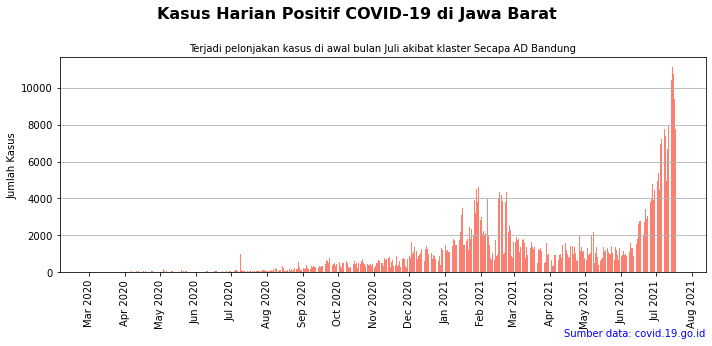

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')

fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Grafik Kasus Harian Sembuh

<ipython-input-14-93e0f4b36ee7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

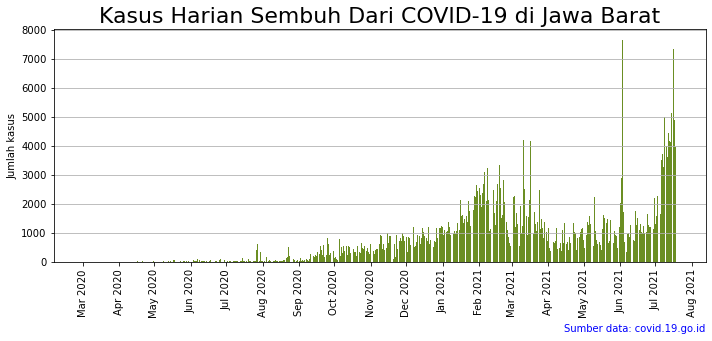

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Grafik Kasus Meninggal

<ipython-input-15-1e75b08c8674>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

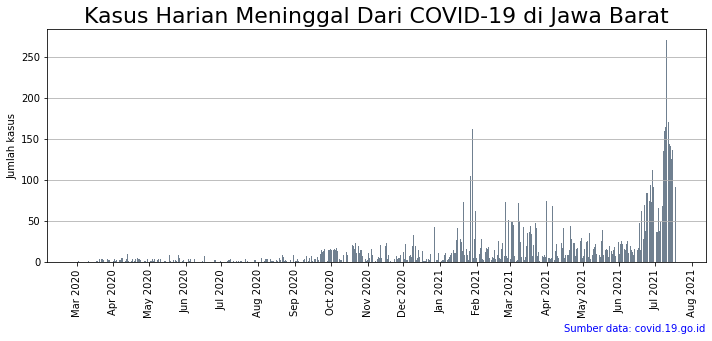

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategray')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-16-83168eae7158>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

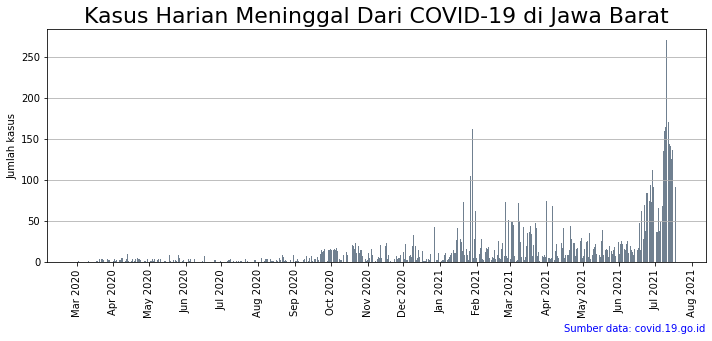

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

----
# Bagaimana dengan minggu ini?

In [17]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     72 non-null     int64
 1   pekan_ke  72 non-null     int64
 2   jumlah    72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       7
1   2020        11       5
2   2020        12      52
3   2020        13     104
4   2020        14     131


In [18]:
# Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)

# Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu. 
# Hasil komparasi ini disimpan dalam kolom baru dengan nama lebih_baik, 
# isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       7                 0       False
1   2020        11       5                 7        True
2   2020        12      52                 5       False
3   2020        13     104                52       False
4   2020        14     131               104       False
5   2020        15     235               131       False
6   2020        16     277               235       False
7   2020        17     216               277        True
8   2020        18     156               216        True
9   2020        19     367               156       False


<Figure size 432x288 with 0 Axes>

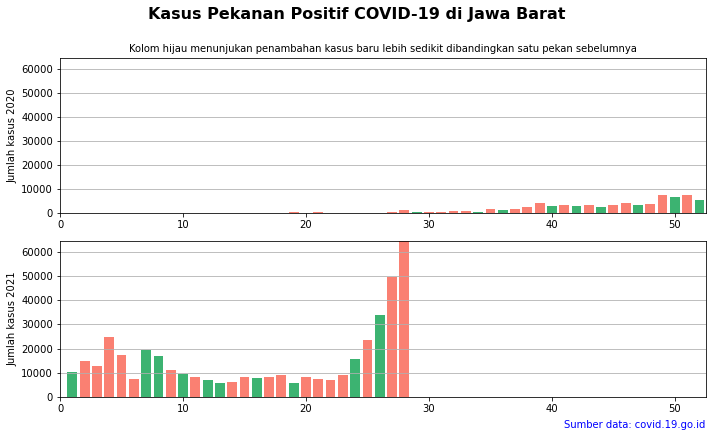

In [19]:
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()

fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
             y=1.00, fontsize=16, fontweight='bold', ha='center')

for i, ax in enumerate(axes):
    ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
           x='pekan_ke', height='jumlah',
           color=['mediumseagreen' if x is True else 'salmon'
                  for x in cov_jabar_pekanan['lebih_baik']])

    if i == 0:
        ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
        
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
                ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

---
## "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi.

method cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik.

In [20]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
499,2021-07-14,101792,368893,6902
500,2021-07-15,107629,374030,7028
501,2021-07-16,110883,381369,7165
502,2021-07-17,115306,386260,7249
503,2021-07-18,119051,390201,7340


# Line Chart

<ipython-input-21-606383d15764>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

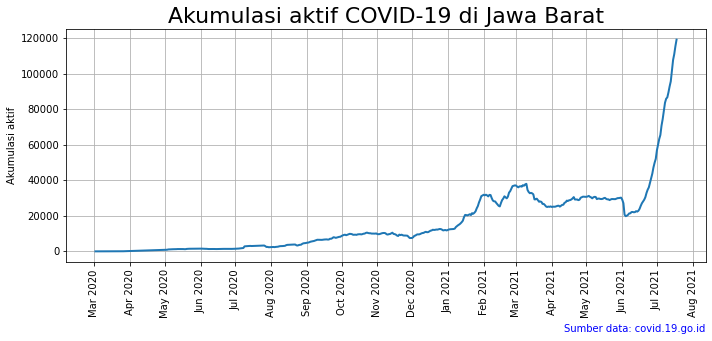

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

# Grafik hasil akumulasi kasus COVID19 di Jawa Barat

<Figure size 432x288 with 0 Axes>

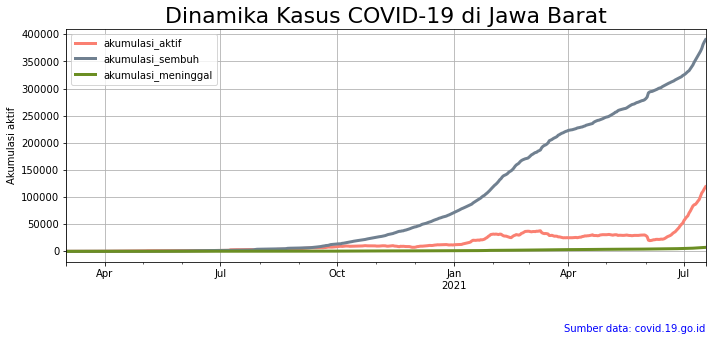

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()

fig, ax = plt.subplots(figsize=(10, 5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                           color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
            fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()